In [199]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [200]:
# read in dataset as DataFrame
HMS = pd.read_csv('2016-2017.csv')

In [201]:
# replace Excel NULL's with Python NaN's
HMS = HMS.replace(['#NULL!'], [np.NaN])

In [202]:
# separate out standard survey modules
HMS_ids = HMS.loc[:, 'schoolnum':'responseid']
HMS_demo = HMS.loc[:, 'age':'disab_3']
HMS_mhstatus = HMS.loc[:, 'diener1':'sleep_np2']
HMS_mhhelp = HMS.loc[:, 'dx_dep1':'pay_mh']

In [287]:
def tidyCatVarGroup(varGroup, categoryName, uniqueID, numMetrics):
    
    # 1) convert categorical variables into dummy/indicator variables
    dummies = pd.get_dummies(varGroup)
    dummies.columns = varGroup.columns
    
    # 2) add unique ID + numerical metrics
    dummies.insert(0, uniqueID.name, uniqueID)
    data = dummies.join(numMetrics.apply(pd.to_numeric))
    
    # 3) melt data from wide to tall
    melted_data = pd.melt(data, id_vars = list(numMetrics.columns.insert(0, uniqueID.name)), var_name = categoryName)
    
    # 4) Filter out all the 0 values (aka: this person doesn't identity with this race) and drop column
    tidy_data = melted_data.loc[melted_data.loc[:,'value'] == 1]
    tidy_data = tidy_data.drop('value', axis = 1)
    
    return tidy_data

In [291]:
varGroup = HMS.loc[:, 'race_black':'race_other']
uniqueID = HMS_ids['responseid']
numMetrics = pd.concat([HMS_mhstatus['flourish'], HMS_mhstatus['deprawsc'], HMS_mhstatus['anx_score']], axis=1)

tidy = tidyCatVarGroup(varGroup, 'race', uniqueID, numMetrics)
tidy.head()

,responseid,flourish,deprawsc,anx_score,race
20,R_1gvZNcJatOt9lEi,49.0,NaN,NaN,race_black
40,R_1JOq1q31fzyKpXu,45.0,NaN,NaN,race_black
47,R_2xwWffFvNbw4BOp,NaN,NaN,NaN,race_black
60,R_27kz8oG4lLC41TA,43.0,NaN,NaN,race_black
89,R_1NC8EpaqcDX0CLm,52.0,NaN,NaN,race_black


## walkthrough of tidyCatVarGroup implementation

In [253]:
# separate out variable group: race
HMS_race = HMS.loc[:, 'race_black':'race_other']
race_cols = HMS_race.columns
HMS_race.head()

,race_black,race_ainaan,race_asian,race_his_temp,race_pi,race_mides,race_white,race_other
0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [254]:
# convert categorical variable into dummy/indicator variables
HMS_race = pd.get_dummies(HMS_race)
HMS_race.columns = race_cols
HMS_race.head()

,race_black,race_ainaan,race_asian,race_his_temp,race_pi,race_mides,race_white,race_other
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [255]:
# add unique ID/metric
HMS_race.insert(loc=0, column='responseid', value=HMS_ids['responseid']) # add unique responseID
HMS_race.insert(loc=1, column='flourish', value=HMS_mhstatus['flourish'])
HMS_race.insert(loc=1, column='deprawsc', value=HMS_mhstatus['deprawsc'])
HMS_race.head()

,responseid,deprawsc,flourish,race_black,race_ainaan,race_asian,race_his_temp,race_pi,race_mides,race_white,race_other
0,R_2BfEp8uMDKl3fvY,NaN,32,0,0,0,0,0,1,0,0
1,R_31yEX4Xz6bZzgUr,NaN,40,0,0,0,0,0,0,1,0
2,R_271Y5b5fBW71JTb,NaN,53,0,0,0,0,0,0,1,0
3,R_1jfUWMzyJCOaAWt,NaN,44,0,0,0,0,0,0,1,0
4,R_2zVhw9BO1wYB9Jn,NaN,NaN,0,0,0,0,0,0,1,0


In [207]:
# melt variable group from wide to tall
HMS_race_melt = pd.melt(HMS_race, id_vars = ['responseid', 'flourish', 'deprawsc'], var_name = 'race')
HMS_race_melt.head()

,responseid,flourish,deprawsc,race,value
0,R_2BfEp8uMDKl3fvY,32,NaN,race_black,0
1,R_31yEX4Xz6bZzgUr,40,NaN,race_black,0
2,R_271Y5b5fBW71JTb,53,NaN,race_black,0
3,R_1jfUWMzyJCOaAWt,44,NaN,race_black,0
4,R_2zVhw9BO1wYB9Jn,NaN,NaN,race_black,0


In [208]:
(HMS_race_melt['value'] == 1).value_counts()

False    372232
True      57848
Name: value, dtype: int64

In [209]:
# Filter out all the 0 values (aka: this person doesn't identity with this race)
HMS_race_melt = HMS_race_melt.loc[HMS_race_melt.loc[:,"value"] == 1]
del HMS_race_melt['value']
HMS_race_melt.head()

,responseid,flourish,deprawsc,race
20,R_1gvZNcJatOt9lEi,49,NaN,race_black
40,R_1JOq1q31fzyKpXu,45,NaN,race_black
47,R_2xwWffFvNbw4BOp,NaN,NaN,race_black
60,R_27kz8oG4lLC41TA,43,NaN,race_black
89,R_1NC8EpaqcDX0CLm,52,NaN,race_black


## attempt to pairplot tidy data

In [187]:
HMS_race_melt['flourish'] = pd.to_numeric(HMS_race_melt['flourish'])
HMS_race_melt['deprawsc'] = pd.to_numeric(HMS_race_melt['deprawsc'])

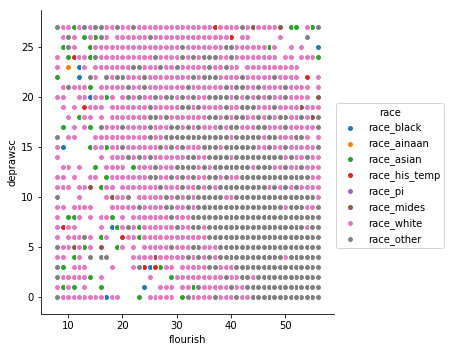

In [193]:
sns.pairplot(HMS_race_melt[['flourish', 'deprawsc', 'race']], hue = 'race', x_vars = 'flourish', y_vars = 'deprawsc', dropna = True, size = 5)


In [ ]:
# next steps: try different plot types (with all races + just one control) to see which is best for metrics like flourish
# next steps: convert this all up until plot into a single function that takes in varGroup, uniqueID, metric